In [6]:
# Import libraries

import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import plot_model



import tensorflow_datasets as tfds

In [7]:
# Load the data

p_camelyon, p_camelyon_info = tfds.load("patch_camelyon", with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteD0BXBR/patch_camelyon-test.tfrecord


  0%|          | 0/32768 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteD0BXBR/patch_camelyon-train.tfrecord


  0%|          | 0/262144 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/patch_camelyon/2.0.0.incompleteD0BXBR/patch_camelyon-validation.tfrecord


  0%|          | 0/32768 [00:00<?, ? examples/s]

Dataset patch_camelyon downloaded and prepared to /root/tensorflow_datasets/patch_camelyon/2.0.0. Subsequent calls will reuse this data.


In [8]:
# Defining a "normalize" function to process the data before feeding it into the deep neural network. 

def normalize(x):
  image, label = x['image'], x['label']
  image = tf.image.convert_image_dtype(image, tf.float32)
  label = tf.one_hot(label, 2, dtype=tf.float32)
  return image, label

In [9]:
# Applying "normalize" function along with others to the data

# Processing the training dataset
train_ds = p_camelyon['train'].map(normalize, num_parallel_calls=8)
train_ds = train_ds.shuffle(1024)
train_ds = train_ds.repeat()
train_ds = train_ds.batch(32)
train_ds = train_ds.prefetch(2)

# Processing validation dataset
validation_ds = p_camelyon['validation'].map(normalize, num_parallel_calls=8)
validation_ds = validation_ds.repeat()
validation_ds = validation_ds.batch(128)
validation_ds = validation_ds.prefetch(2)

#Processing the test dataset
test_ds = p_camelyon['test'].map(normalize, num_parallel_calls=8)
test_ds = test_ds.batch(128)
test_ds = test_ds.prefetch(2)

#Seperating image and label into different variables
train_images, train_labels = next(iter(train_ds))
valid_images, valid_labels = next(iter(validation_ds))
test_images, test_labels  = next(iter(test_ds))



In [10]:
import math

batch_size_for_training = 32
batch_size_for_validation = 128
batch_size_for_test = 128

training_size = 262144
validation_size = 32768
test_size =  32768
        

# Calculate steps for training and testing the model
calculate_steps_training = lambda x: int(math.ceil(1. * x / batch_size_for_training))
calculate_steps_validation = lambda x: int(math.ceil(1. * x / batch_size_for_validation))
calculate_steps_test= lambda x: int(math.ceil(1. * x / batch_size_for_test))

steps_per_epoch = calculate_steps_training(training_size) 
validation_steps = calculate_steps_validation(validation_size)
steps = calculate_steps_test(test_size)

print("Training steps: ", steps_per_epoch)
print("Validation steps: ", validation_steps)
print("Testing steps: ", steps)


Training steps:  8192
Validation steps:  256
Testing steps:  256


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 94, 94, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 42, 42, 16)        4624      
                                                             

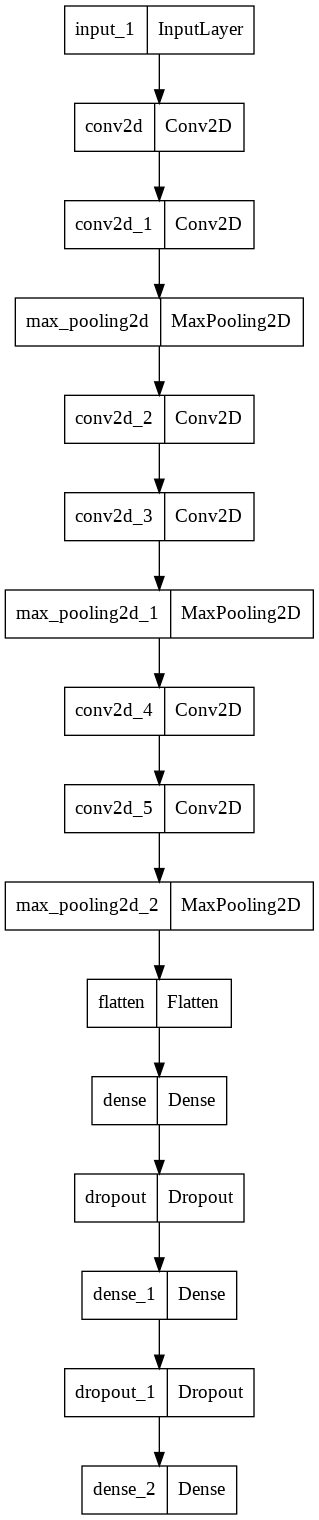

In [11]:
# Building the Convolutonal Neural Network Version 2 Model 1

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Rely activation functions only, with softmax activation function for the last Dense layer
x = Conv2D(16, (3,3), activation='relu', padding='valid')(input)
x = Conv2D(16, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = Conv2D(16, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='valid')(x)
x = Conv2D(16, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adam
# Loss function = binary_cross_entropy
model_1_version_2 = Model(inputs=input, outputs = output)
model_1_version_2.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['acc'])

model_1_version_2.summary()
plot_model(model_1_version_2)

In [12]:
# Building the Convolutonal Neural Network Version 2 Model 2

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Rely activation functions only, with softmax activation function for the last Dense layer
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='sigmoid', padding='valid')(x)
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adam
# Loss function = binary_cross_entropy
model_2_version_2 = Model(inputs=input, outputs = output)
model_2_version_2.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['acc'])

model_2_version_2.summary()
#plot_model(model_2_version_2)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 94, 94, 16)        448       
                                                                 
 conv2d_7 (Conv2D)           (None, 92, 92, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 46, 46, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 44, 44, 32)        4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 42, 42, 16)        4624      
                                                           

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 94, 94, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 92, 92, 16)        2320      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 46, 46, 16)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 44, 44, 32)        4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 42, 42, 16)        4624      
                                                           

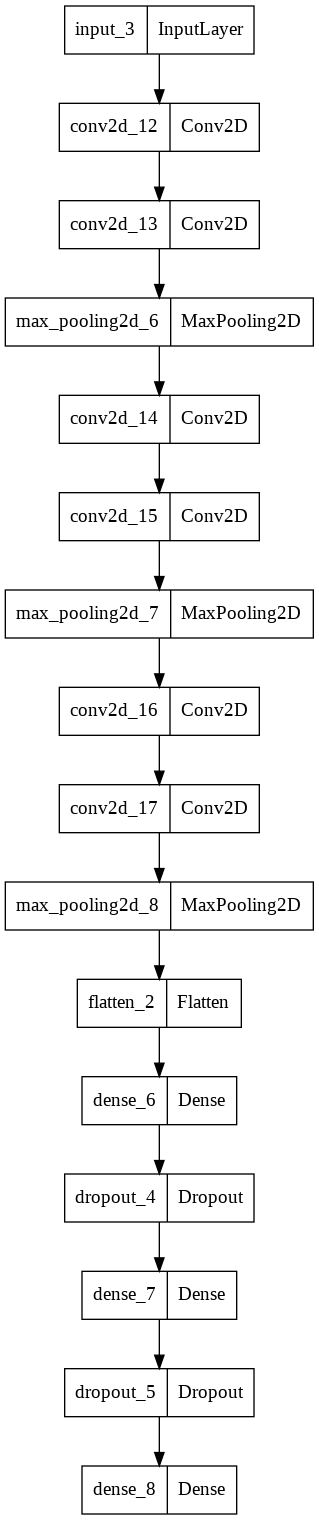

In [13]:
# Building the Convolutonal Neural Network Version 2 Model 3

# Setting up the output with the right size
input = Input(shape=(96,96,3))

# Rely activation functions only, with softmax activation function for the last Dense layer
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(input)
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='valid')(x)
x = Conv2D(16, (3,3), activation='relu', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Conv2D(64, (3,3), activation='sigmoid', padding='valid')(x)
x = Conv2D(16, (3,3), activation='sigmoid', padding='valid')(x)
x = MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(2, activation='softmax')(x)

# Optimizer = adam
# Loss function = binary_cross_entropy
model_3_version_2 = Model(inputs=input, outputs = output)
model_3_version_2.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['acc'])

model_3_version_2.summary()
plot_model(model_3_version_2)

In [14]:
import matplotlib.pyplot as plt

def plot_hist(history):
  plt.plot(history.history["acc"])
  plt.plot(history.history["val_acc"])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(["train", "validation"], loc="upper left")
  plt.show()

In [15]:
# Training the model

history_1_version_2= model_1_version_2.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10
8192/8192 [==============================] - 121s 13ms/step - loss: 0.4069 - acc: 0.8197 - val_loss: 0.4255 - val_acc: 0.8102
Epoch 2/10
8192/8192 [==============================] - 108s 13ms/step - loss: 0.2865 - acc: 0.8826 - val_loss: 0.4004 - val_acc: 0.8358
Epoch 3/10
8192/8192 [==============================] - 108s 13ms/step - loss: 0.2465 - acc: 0.9026 - val_loss: 0.3990 - val_acc: 0.8384
Epoch 4/10
8192/8192 [==============================] - 109s 13ms/step - loss: 0.2277 - acc: 0.9111 - val_loss: 0.3572 - val_acc: 0.8487
Epoch 5/10
8192/8192 [==============================] - 125s 15ms/step - loss: 0.2138 - acc: 0.9176 - val_loss: 0.4074 - val_acc: 0.8438
Epoch 6/10
8192/8192 [==============================] - 124s 15ms/step - loss: 0.2054 - acc: 0.9216 - val_loss: 0.3877 - val_acc: 0.8470
Epoch 7/10
8192/8192 [==============================] - 110s 13ms/step - loss: 0.1978 - acc: 0.9243 - val_loss: 0.3731 - val_acc: 0.8524
Epoch 8/10
8192/8192 [===================

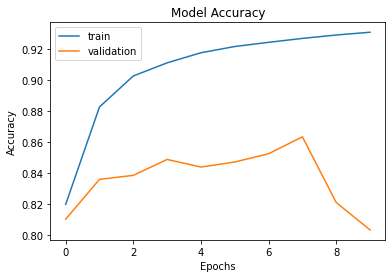

In [16]:
plot_hist(history_1_version_2)

In [17]:
# Training the model 

history_2_version_2= model_2_version_2.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10
8192/8192 [==============================] - 113s 14ms/step - loss: 0.6932 - acc: 0.5003 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 2/10
8192/8192 [==============================] - 111s 14ms/step - loss: 0.6932 - acc: 0.5005 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 3/10
8192/8192 [==============================] - 111s 13ms/step - loss: 0.6932 - acc: 0.5004 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 4/10
8192/8192 [==============================] - 112s 14ms/step - loss: 0.6932 - acc: 0.5005 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 5/10
8192/8192 [==============================] - 126s 15ms/step - loss: 0.6932 - acc: 0.5004 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 6/10
8192/8192 [==============================] - 111s 14ms/step - loss: 0.6932 - acc: 0.4999 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 7/10
8192/8192 [==============================] - 128s 16ms/step - loss: 0.6932 - acc: 0.5011 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 8/10
8192/8192 [===================

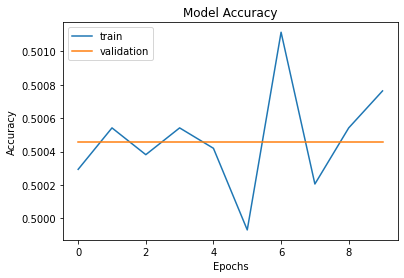

In [18]:
plot_hist(history_2_version_2)

In [19]:
# Training the model

history_3_version_2= model_2_version_2.fit(train_ds, validation_data=validation_ds, epochs = 10, verbose = 1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/10
8192/8192 [==============================] - 111s 13ms/step - loss: 0.6932 - acc: 0.5001 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 2/10
8192/8192 [==============================] - 110s 13ms/step - loss: 0.6932 - acc: 0.5002 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 3/10
8192/8192 [==============================] - 110s 13ms/step - loss: 0.6932 - acc: 0.5009 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 4/10
8192/8192 [==============================] - 123s 15ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 5/10
8192/8192 [==============================] - 110s 13ms/step - loss: 0.6932 - acc: 0.5001 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 6/10
8192/8192 [==============================] - 124s 15ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 7/10
8192/8192 [==============================] - 123s 15ms/step - loss: 0.6932 - acc: 0.5007 - val_loss: 0.6932 - val_acc: 0.5005
Epoch 8/10
8192/8192 [===================

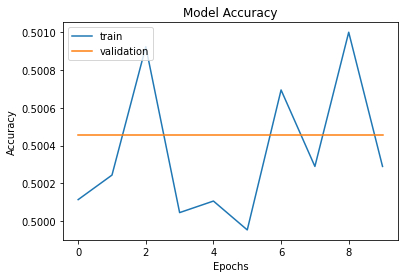

In [20]:
plot_hist(history_3_version_2)

In [21]:
#Testing the model

print("Test dataset accuracy for model 1 version 2 is: {0:.4f}".format(model_1_version_2.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 2 version 2 is: {0:.4f}".format(model_2_version_2.evaluate(test_ds, steps=steps, verbose=1)[1]))
print("Test dataset accuracy for model 3 version 2 is: {0:.4f}".format(model_3_version_2.evaluate(test_ds, steps=steps, verbose=1)[1]))

256/256 [==============================] - 9s 33ms/step - loss: 0.6187 - acc: 0.7766
Test dataset accuracy for model 1 version 2 is: 0.7766
256/256 [==============================] - 8s 31ms/step - loss: 0.6932 - acc: 0.5002
Test dataset accuracy for model 2 version 2 is: 0.5002
256/256 [==============================] - 8s 31ms/step - loss: 0.6946 - acc: 0.5002
Test dataset accuracy for model 3 version 2 is: 0.5002
